In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# 파일 업로드 기능 실행 
from google.colab import files
uploaded = files.upload() 

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving gangnam.csv to gangnam.csv
User uploaded file "gangnam.csv" with length 2989 bytes


In [4]:
print(pd.__version__)
# 한글이 깨져서 encodin 지정함 
df = pd.read_csv('gangnam.csv', parse_dates =["date"], index_col ="date", engine='python',encoding='euc-kr', dtype={'trade_price_idx_value':'float'}) 
  
df.head()

0.25.3


,trade_price_idx_value,Unnamed: 2
date,,
2006-01-01,74.2,NaN
2006-02-01,75.8,NaN
2006-03-01,78.1,NaN
2006-04-01,81.4,NaN
2006-05-01,83.6,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 165 entries, 2006-01-01 to 2019-03-01
Data columns (total 2 columns):
trade_price_idx_value    165 non-null float64
Unnamed: 2               0 non-null float64
dtypes: float64(2)
memory usage: 3.9 KB


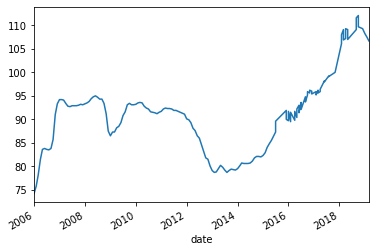

In [6]:
df['trade_price_idx_value'].plot()

In [7]:
df

,trade_price_idx_value,Unnamed: 2
date,,
2006-01-01,74.2,NaN
2006-02-01,75.8,NaN
2006-03-01,78.1,NaN
2006-04-01,81.4,NaN
2006-05-01,83.6,NaN
...,...,...
2018-10-01,109.7,NaN
2018-12-01,109.3,NaN
2019-01-01,108.3,NaN


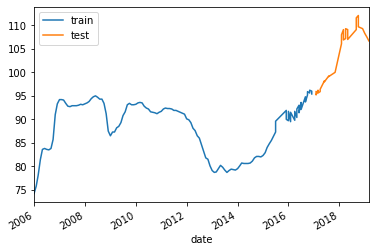

In [8]:
# 2017/1/1 까지의 데이터를 트레이닝셋.
# 그 이후 데이터를 테스트셋으로 한다.
split_date = pd.Timestamp('01-01-2017')


train = df.loc[:split_date, ['trade_price_idx_value']]
test = df.loc[split_date:, ['trade_price_idx_value']]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [9]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

array([[0.        ],
       [0.07272727],
       [0.17727273],
       [0.32727273],
       [0.42727273],
       [0.43636364],
       [0.42727273],
       [0.42272727],
       [0.43636364],
       [0.52272727],
       [0.76363636],
       [0.86818182],
       [0.90909091],
       [0.90909091],
       [0.90454545],
       [0.87272727],
       [0.84545455],
       [0.84090909],
       [0.85      ],
       [0.85      ],
       [0.85      ],
       [0.85454545],
       [0.86363636],
       [0.85909091],
       [0.86818182],
       [0.87727273],
       [0.89090909],
       [0.91818182],
       [0.93636364],
       [0.94545455],
       [0.93181818],
       [0.91363636],
       [0.91363636],
       [0.87272727],
       [0.77272727],
       [0.60454545],
       [0.55909091],
       [0.59545455],
       [0.59545455],
       [0.63636364],
       [0.65      ],
       [0.68636364],
       [0.75454545],
       [0.79090909],
       [0.85909091],
       [0.87272727],
       [0.85909091],
       [0.859

In [10]:
train_sc_df = pd.DataFrame(train_sc, columns=['trade_price_idx_value'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['trade_price_idx_value'], index=test.index)
train_sc_df.head()

,trade_price_idx_value
date,
2006-01-01,0.000000
2006-02-01,0.072727
2006-03-01,0.177273
2006-04-01,0.327273
2006-05-01,0.427273


In [11]:

for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['trade_price_idx_value'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['trade_price_idx_value'].shift(s)

train_sc_df.head(13)

,trade_price_idx_value,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,,
2006-01-01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-01,0.072727,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-01,0.177273,0.072727,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-01,0.327273,0.177273,0.072727,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-01,0.427273,0.327273,0.177273,0.072727,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-01,0.436364,0.427273,0.327273,0.177273,0.072727,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-01,0.427273,0.436364,0.427273,0.327273,0.177273,0.072727,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2006-08-01,0.422727,0.427273,0.436364,0.427273,0.327273,0.177273,0.072727,0.000000,NaN,NaN,NaN,NaN,NaN
2006-09-01,0.436364,0.422727,0.427273,0.436364,0.427273,0.327273,0.177273,0.072727,0.000000,NaN,NaN,NaN,NaN


In [12]:
X_train = train_sc_df.dropna().drop('trade_price_idx_value', axis=1)
y_train = train_sc_df.dropna()[['trade_price_idx_value']]

X_test = test_sc_df.dropna().drop('trade_price_idx_value', axis=1)
y_test = test_sc_df.dropna()[['trade_price_idx_value']]



X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,
2007-01-01,0.868182,0.763636,0.522727,0.436364,0.422727,0.427273,0.436364,0.427273,0.327273,0.177273,0.072727,0.000000
2007-02-01,0.909091,0.868182,0.763636,0.522727,0.436364,0.422727,0.427273,0.436364,0.427273,0.327273,0.177273,0.072727
2007-03-01,0.909091,0.909091,0.868182,0.763636,0.522727,0.436364,0.422727,0.427273,0.436364,0.427273,0.327273,0.177273
2007-04-01,0.904545,0.909091,0.909091,0.868182,0.763636,0.522727,0.436364,0.422727,0.427273,0.436364,0.427273,0.327273
2007-05-01,0.872727,0.904545,0.909091,0.909091,0.868182,0.763636,0.522727,0.436364,0.422727,0.427273,0.436364,0.427273


In [13]:
y_train.head()

,trade_price_idx_value
date,
2007-01-01,0.909091
2007-02-01,0.909091
2007-03-01,0.904545
2007-04-01,0.872727
2007-05-01,0.845455


In [14]:
print(type(X_train))
X_train = X_train.values
print(type(X_train))
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values
print(X_train.shape)
#print(X_train)
print(y_train.shape)
#print(y_train)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(125, 12)
(125, 1)


In [15]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

최종 DATA
(125, 12, 1)
[[[0.86818182]
  [0.76363636]
  [0.52272727]
  ...
  [0.17727273]
  [0.07272727]
  [0.        ]]

 [[0.90909091]
  [0.86818182]
  [0.76363636]
  ...
  [0.32727273]
  [0.17727273]
  [0.07272727]]

 [[0.90909091]
  [0.90909091]
  [0.86818182]
  ...
  [0.42727273]
  [0.32727273]
  [0.17727273]]

 ...

 [[0.97272727]
  [0.98636364]
  [0.95454545]
  ...
  [0.81818182]
  [0.73636364]
  [0.79545455]]

 [[1.        ]
  [0.97272727]
  [0.98636364]
  ...
  [0.85454545]
  [0.81818182]
  [0.73636364]]

 [[0.99090909]
  [1.        ]
  [0.97272727]
  ...
  [0.78181818]
  [0.85454545]
  [0.81818182]]]
[[0.90909091]
 [0.90909091]
 [0.90454545]
 [0.87272727]
 [0.84545455]
 [0.84090909]
 [0.85      ]
 [0.85      ]
 [0.85      ]
 [0.85454545]
 [0.86363636]
 [0.85909091]
 [0.86818182]
 [0.87727273]
 [0.89090909]
 [0.91818182]
 [0.93636364]
 [0.94545455]
 [0.93181818]
 [0.91363636]
 [0.91363636]
 [0.87272727]
 [0.77272727]
 [0.60454545]
 [0.55909091]
 [0.59545455]
 [0.59545455]
 [0.636

In [16]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model = Sequential() # Sequeatial Model 
model.add(LSTM(20, input_shape=(12, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Using TensorFlow backend.








Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [17]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(X_train_t, y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





125/125 [==============================] - 1s 8ms/step - loss: 0.3663
Epoch 2/100
125/125 [==============================] - 0s 336us/step - loss: 0.2657
Epoch 3/100
125/125 [==============================] - 0s 381us/step - loss: 0.1789
Epoch 4/100
125/125 [==============================] - 0s 346us/step - loss: 0.1103
Epoch 5/100
125/125 [==============================] - 0s 351us/step - loss: 0.0600
Epoch 6/100
125/125 [==============================] - 0s 324us/step - loss: 0.0325
Epoch 7/100
125/125 [==============================] - 0s 425us/step - loss: 0.0285
Epoch 8/100
125/125 [==============================] - 0s 496us/step - loss: 0.0335
Epoch 00008: early stopping


In [18]:
print(X_test_t)

[[[1.17272727]
  [1.17272727]
  [1.13181818]
  [1.13636364]
  [1.08181818]
  [1.09090909]
  [1.00909091]
  [0.98636364]
  [0.97272727]
  [1.        ]
  [0.95454545]
  [0.98636364]]

 [[1.45      ]
  [1.17272727]
  [1.17272727]
  [1.13181818]
  [1.13636364]
  [1.08181818]
  [1.09090909]
  [1.00909091]
  [0.98636364]
  [0.97272727]
  [1.        ]
  [0.95454545]]

 [[1.53636364]
  [1.45      ]
  [1.17272727]
  [1.17272727]
  [1.13181818]
  [1.13636364]
  [1.08181818]
  [1.09090909]
  [1.00909091]
  [0.98636364]
  [0.97272727]
  [1.        ]]

 [[1.58636364]
  [1.53636364]
  [1.45      ]
  [1.17272727]
  [1.17272727]
  [1.13181818]
  [1.13636364]
  [1.08181818]
  [1.09090909]
  [1.00909091]
  [0.98636364]
  [0.97272727]]

 [[1.48636364]
  [1.58636364]
  [1.53636364]
  [1.45      ]
  [1.17272727]
  [1.17272727]
  [1.13181818]
  [1.13636364]
  [1.08181818]
  [1.09090909]
  [1.00909091]
  [0.98636364]]

 [[1.5       ]
  [1.48636364]
  [1.58636364]
  [1.53636364]
  [1.45      ]
  [1.17272727]
